<a href="https://colab.research.google.com/github/raha86/Logistic_Regression_Breast_Cancer_Prediction/blob/main/Logistic_Regression_Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression - Breast Cancer Prediction**

## **About Dataset**

**Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign) **(Target Variable)**

3 - 32)
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

## **Problem Statement:**
Create a model to predict presence of breast cancer based on other independant variables.

In [376]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
data = pd.read_csv('/content/drive/MyDrive/ML Notebooks/Logistic_Regression_Breast_cancer_prediction/breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [378]:
# settings for showing all columns
pd.set_option('display.max_columns', None)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [379]:
data.shape

(569, 33)

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [381]:
data.describe().T.style.format('{:.6}')

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.03718e+07,1.25021e+08,8670.0,8.69218e+05,9.06024e+05,8.81313e+06,9.11321e+08
radius_mean,569.0,14.1273,3.52405,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,19.2896,4.30104,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,91.969,24.299,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,654.889,351.914,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,0.0963603,0.0140641,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,0.104341,0.0528128,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,0.0887993,0.0797198,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,0.0489191,0.0388028,0.0,0.02031,0.0335,0.074,0.2012
symmetry_mean,569.0,0.181162,0.0274143,0.106,0.1619,0.1792,0.1957,0.304


In [382]:
data.duplicated().sum()

np.int64(0)

In [383]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [384]:
# dropping unrequired columns: 'id', 'Unnamed: 32'
data.drop(['id', 'Unnamed: 32'], inplace = True, axis=1)

In [385]:
# Replacing M by 1 and B by 0
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)

In [386]:
data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [387]:
data['diagnosis'].value_counts(normalize=True) * 100

,proportion
diagnosis,
0,62.741652
1,37.258348


***The data is imbalanced.***

## **Feature Selection**

Here we're using **correlation matrix and heatmap** for feature selection.

<Axes: >

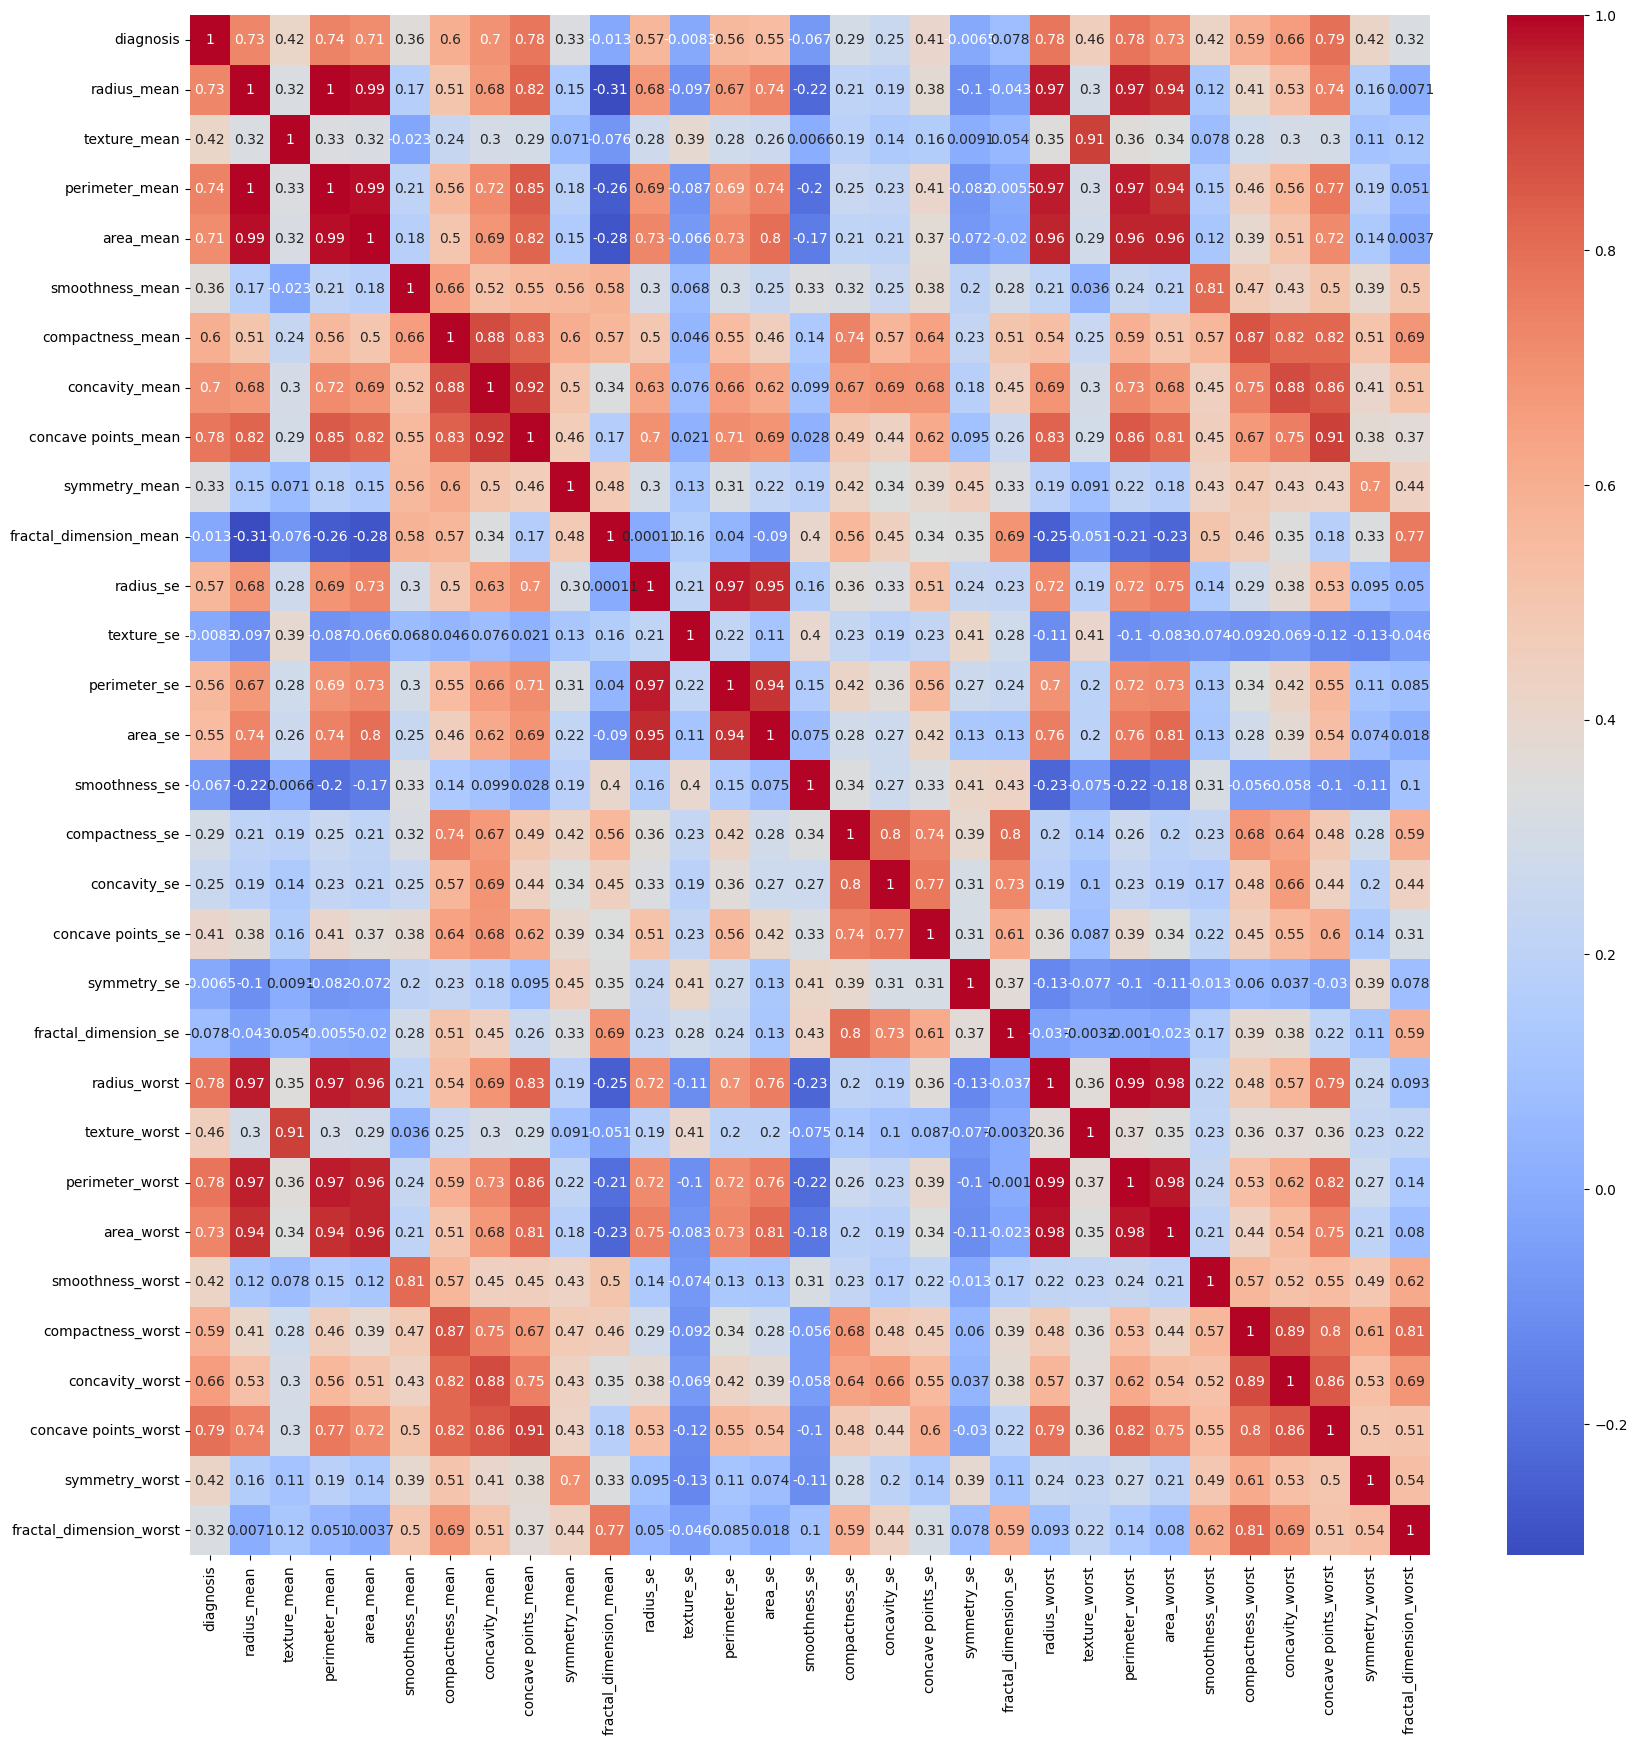

In [388]:
correlation = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [389]:
# feature selection based on the correlation of independant variables with the dependant variable
selected_feature = []
for col in correlation.columns:
    if col != 'diagnosis' and correlation.loc['diagnosis', col] >= 0.4 :
        selected_feature.append(col)

selected_feature

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

## **Data Preprocessing**

In [390]:
Y = data['diagnosis'].copy()
X = data[selected_feature].copy()

**Standardizing the feature**

In [391]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)

In [392]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.10952635,
         2.29607613,  2.75062224],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.14674897,
         1.0870843 , -0.24388967],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  0.85497394,
         1.95500035,  1.152255  ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.3267666 ,
         0.41406869, -1.10454895],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  3.19760468,
         2.28998549,  1.91908301],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.30583065,
        -1.74506282, -0.04813821]])

**Splitting Training and Test Data**

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

## **Model Building**

In [394]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

**Making Predictions**

In [395]:
predictions = lr.predict(X_test)

## **Model Evaluation**

As the data is not balanced, we are using the metric **ROC-AUC Score** **(Receiver Operating Characteristics Area Under Curve)** to evaluate the performance of the model.

In [396]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(Y_test, predictions)

np.float64(0.9880952380952381)

**Visual Representation**

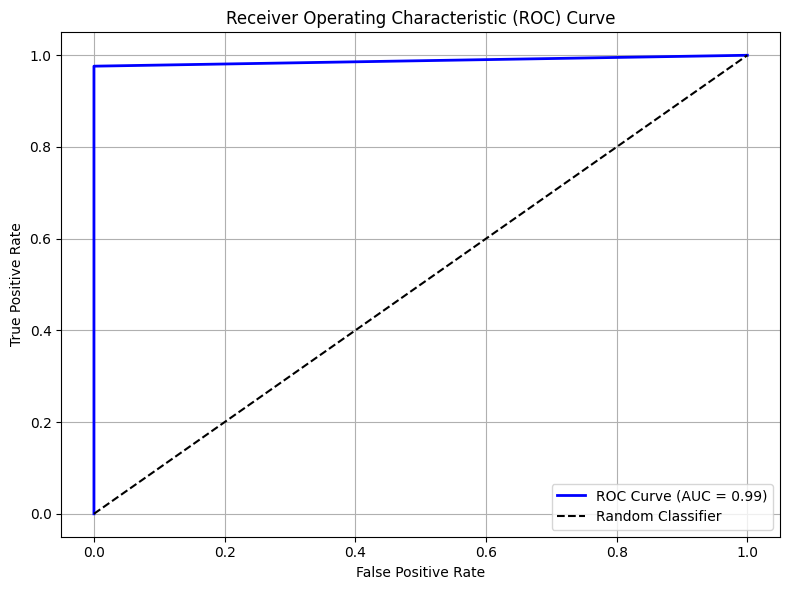

In [397]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions)

# 4. Compute AUC score
roc_auc = roc_auc_score(Y_test, predictions)

# 5. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()